✅ Data Loaded Successfully
Shape: (1460, 81)

--- First 10 Rows ---


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null

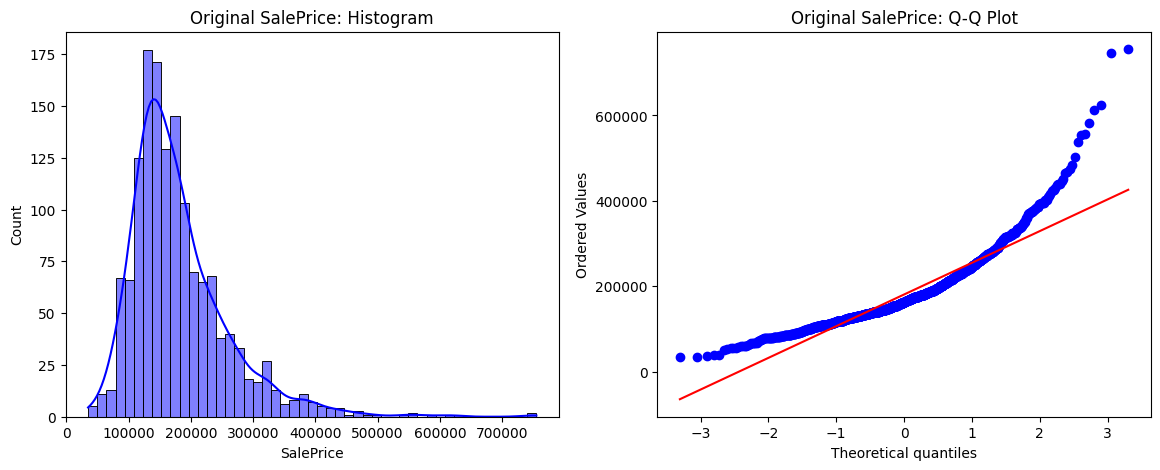


⚠️ Distribution is skewed (Skew: 1.8829). Applying Log Transformation...
✅ New Skewness: 0.1213


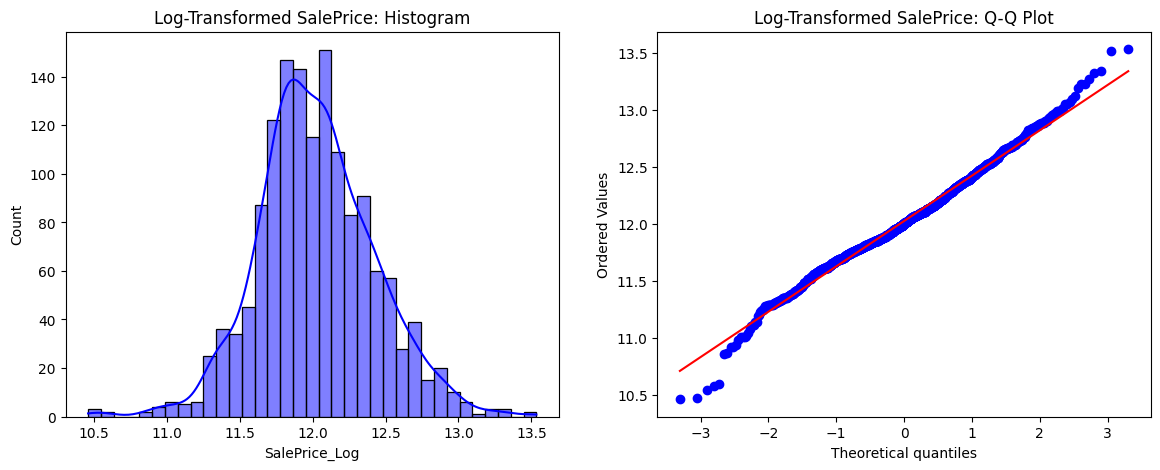

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Load & Glimpse
# ---------------------------------------------------------
file_path = '/Volumes/study/A_data-science/Python-Code/EDA -Assignment/.env/train.csv'
df = pd.read_csv(file_path)

print("✅ Data Loaded Successfully")
print(f"Shape: {df.shape}")

# Display first 10 rows
print("\n--- First 10 Rows ---")
display(df.head(10))

# Display Info (Column names & Types)
print("\n--- DataFrame Info ---")
df.info()

# 2. Variable Categorization
# ---------------------------------------------------------
# Select columns based on data type
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"\n📊 Feature Split:")
print(f"Numerical Features ({len(numerical_features)}): {numerical_features[:5]} ...")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features[:5]} ...")

# 3. Target Variable Analysis (SalePrice)
# ---------------------------------------------------------
target = 'SalePrice'

# Calculate Statistics
mu = df[target].mean()
med = df[target].median()
skew = df[target].skew()
kurt = df[target].kurt()

print(f"\n🎯 Target Analysis ({target}):")
print(f"Mean: {mu:.2f}")
print(f"Median: {med:.2f}")
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")

# 4. Visualization & Transformation Logic
# ---------------------------------------------------------
def diagnostic_plots(data, variable, title_prefix):
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], kde=True, color='blue')
    plt.title(f'{title_prefix}: Histogram')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.title(f'{title_prefix}: Q-Q Plot')

    plt.show()

# Plot Original Data
diagnostic_plots(df, target, 'Original SalePrice')

# Check Normality & Transform
# A skewness > 1 or  1.5
if abs(skew) > 0.75:
    print(f"\n⚠️ Distribution is skewed (Skew: {skew:.4f}). Applying Log Transformation...")

    # Log Transformation
    df['SalePrice_Log'] = np.log1p(df[target])

    # Re-calculate stats for transformed data
    new_skew = df['SalePrice_Log'].skew()
    print(f"✅ New Skewness: {new_skew:.4f}")

    # Plot Transformed Data
    diagnostic_plots(df, 'SalePrice_Log', 'Log-Transformed SalePrice')
else:
    print("\n✅ Distribution is approximately normal. No transformation needed.")